# Kenya Airways Reviews Sentiment + Emotions Analysis

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/Kenya_Airways_Logo.svg/2560px-Kenya_Airways_Logo.svg.png)
---

### Data scraped from airline quality




In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('KA_reviews_cleaning.csv')
del df['Unnamed: 0']

In [3]:
df.head()

,reviews
0,i frequently fly to kinshasa and chose this ti...
1,05 oct 2023 londonnairobi we are a couple and ...
2,my recent experience with kenya airways was in...
3,delayed and cancelled flights so arrived 10 ho...
4,kigali to amsterdam via nairobi 4th feb 2024 t...


##  Text preprocessing functions  
#### U have to make sure there are:
1. No useless text data.
2. No Uppercase letters (turn all letters to lowercase).
3. No Punctuations.
4. Tokenization and stop words handling.

In [4]:
!pip install stop_words
import string   # we need it for Punctuations removal
from stop_words import get_stop_words   # or we can use from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize # it turn text to list but more faster

# preprocessing function for sentiment analysis
def sentiment_clean_text(text):
    '''
    this function take text and clean it

    Parameters
    ----------
    text : string before preprocessing.

    Returns
    -------
    text : string after preprocessing.

    '''


    # A. first step remove useless text data (if there are any) note: i don't need data before | so I will remove it
    if '|' in text:
        text =  text.split('|')[1]

    # B. second turn letters into lowercase
    text = text.lower()

    # C. third remove all Punctuations.
    text = text.translate(str.maketrans('','',string.punctuation))

    return text


# preprocessing function for emotion analysis
def emotion_clean_text(text):
    '''
    this function take text and clean it then turn it to list of words

    Parameters
    ----------
    text : string

    Returns
    -------
    text_list : list of text words after cleaning.

    '''

    # D. forth step Tokenization and stop words

    # Tokenizaiton: turning string into list of words.
    # Stop words: words without meaning for sentiment analysis.


    # Tokenizaiton
    text = word_tokenize(text,"english")

    # handeling the stop words but what are the stop words
    stop_words = get_stop_words('english') #or we can use stop_words = stopwords.words('english')

    # Removing stop words from the tokenized words list
    text_list = []

    for word in text:
        if word not in stop_words:
            text_list.append(word)


    # return the list of words
    return text_list

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=ec923913a9969aa45c3c42885afd7597a9cc3bc19c45cd7a4a072bad9bcdbc2a
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words


## Emotion text dectionary function
* now it's time to make dictionary function for emotions

In [5]:
def emotion_maping (file,di):
    '''
    this function take emotions file and store emotions in dictionary

    Parameters
    ----------
    file : emotions file

    Returns
    -------
    di : emotions dictionary.

    '''
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        di[word] = emotion

    return di

## Vader Sentiment analysis function  
* Now we have cleaned data so we are ready to do sentiment analysis

In [6]:
# let's import the needed packages
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# function to carry out the
def sentiment_analyze(text):

    scores = SentimentIntensityAnalyzer().polarity_scores(text) # return dictionary of scores

    if (scores['neg'] > scores['pos']):

        return 0

    else:
        return 1

In [7]:
import re
from nltk.corpus import stopwords

def emotion_clean_text(text):
    """
    A function to perform advanced cleaning for emotion analysis.
    """
    # convert text to lowercase
    text = text.lower()
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    return text


## Main Section
* apply functions to the dataset texts

In [8]:
!pip install opendatasets
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import opendatasets as od

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [11]:
# define needed data structures
cleaned_text = ""
temp_emotion_list = []
score = 0
emotion_dict = {}
words_score_dict = {}
moods_list_st = []
moods_list_tp = []
nltk.download('stopwords')

# create category list for better understanding
airline_main_categories = ['flight','service','seat','food','crew','time','good','class','cabin','seats','staff','business']
temp_category_list = []

# get the emotion dictionary ready
emotion_file = open('emotion.txt','r',encoding='utf-8')
emotion_dict = emotion_maping(emotion_file,emotion_dict)
emotion_file.close()

# ------------------------ loop for the skytrx Dataframe ------------------------------

# loop for all reviews in Skytrax dataFrame
for i in range(len(df)):

    # get the review of index i
    text = str(df['reviews'][i])

    # step 1: let's clean the text and assign cleaned list to dataFrame
    # simple clean
    cleaned_text= sentiment_clean_text(text)

    #Step 2: sentiment Analysis
    score = sentiment_analyze(cleaned_text)
    moods_list_st.append(score)


    # Step 3: advanced clean for emotions
    cleaned_text_list = emotion_clean_text(cleaned_text)
    df['reviews'][i] = cleaned_text_list


    # Step 4: emotion list builder
    for word in emotion_dict.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dict[word])

    # Step 5: category list builder
    for cat in airline_main_categories:
        if cat in cleaned_text_list:
            temp_category_list.append(cat)

# now let's create new column for moods for skytrax
df['mood'] = moods_list_st


# ------------------------ loop for the trustpilot Dataframe ------------------------------

# loop for all reviews in trustpilot dataFrame
for i in range(len(df)):

    # get the review of index i
    text = str(df['reviews'][i])

    # step 1: let's clean the text and assign cleaned list to dataFrame
    # simple clean
    cleaned_text= sentiment_clean_text(text)

    #Step 2: sentiment Analysis
    score = sentiment_analyze(cleaned_text)
    moods_list_tp.append(score)


    # Step 3: advanced clean for emotions
    cleaned_text_list = emotion_clean_text(cleaned_text)
    df['reviews'][i] = cleaned_text_list


    # Step 4: emotion list builder
    for word in emotion_dict.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dict[word])

    # Step 5: category list builder
    for cat in airline_main_categories:
        if cat in cleaned_text_list:
            temp_category_list.append(cat)

# now let's create new column for moods trust pilot dataframe
df['mood'] = moods_list_tp


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-11-571fde8e4445>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list


## Plot  findings
* now it's the time to create plots and show findings

### Plot for Vader Sentiment Scores

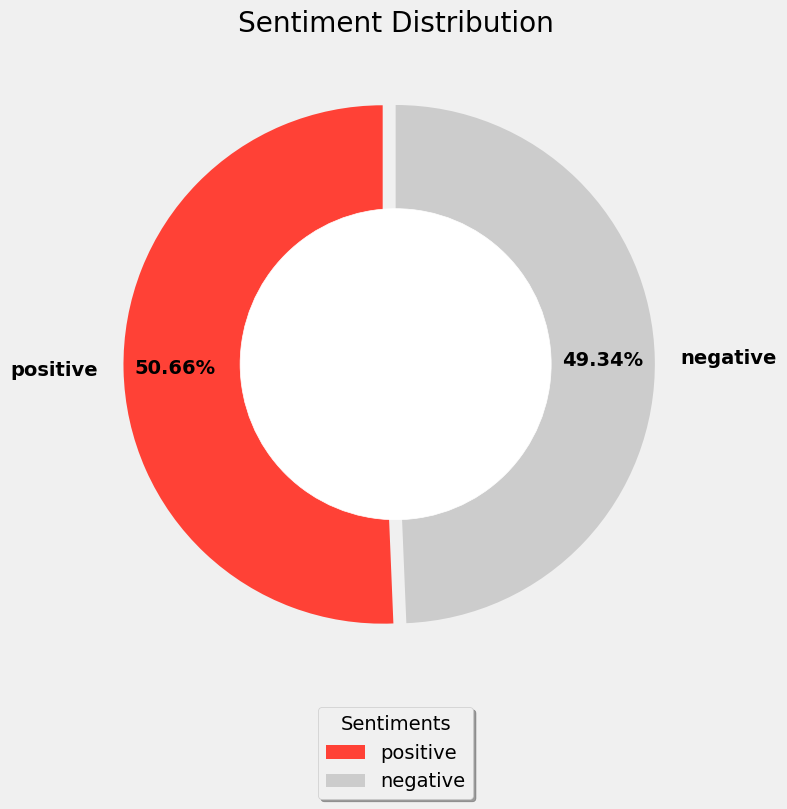

In [12]:
from collections import Counter
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# get summary dictionary for sentiment
moods_list_all = moods_list_st + moods_list_tp
mood_summary = dict(Counter(moods_list_all))

# rename dictionary keys before plotting
mood_summary['positive'] = mood_summary.pop(1)
mood_summary['negative'] = mood_summary.pop(0)

# set up the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#FF4136', '#CCCCCC']
explode = (0.05, 0)  # explode the positive slice
wedges, texts, autotexts = ax.pie(mood_summary.values(), colors=colors, labels=mood_summary.keys(), autopct='%.2f%%', startangle=90, pctdistance=0.8, explode=explode)

# set properties of text and autotext
plt.setp(texts, size=14, weight='bold')
plt.setp(autotexts, size=14, weight='bold')

# add a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.6, color='white', linewidth=0.5)
ax.add_artist(centre_circle)

# add the legend
ax.legend(wedges, mood_summary.keys(), title='Sentiments', loc='center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True)

# add a title
ax.set_title('Sentiment Distribution')

plt.show()


## Plot For frequent Emotions

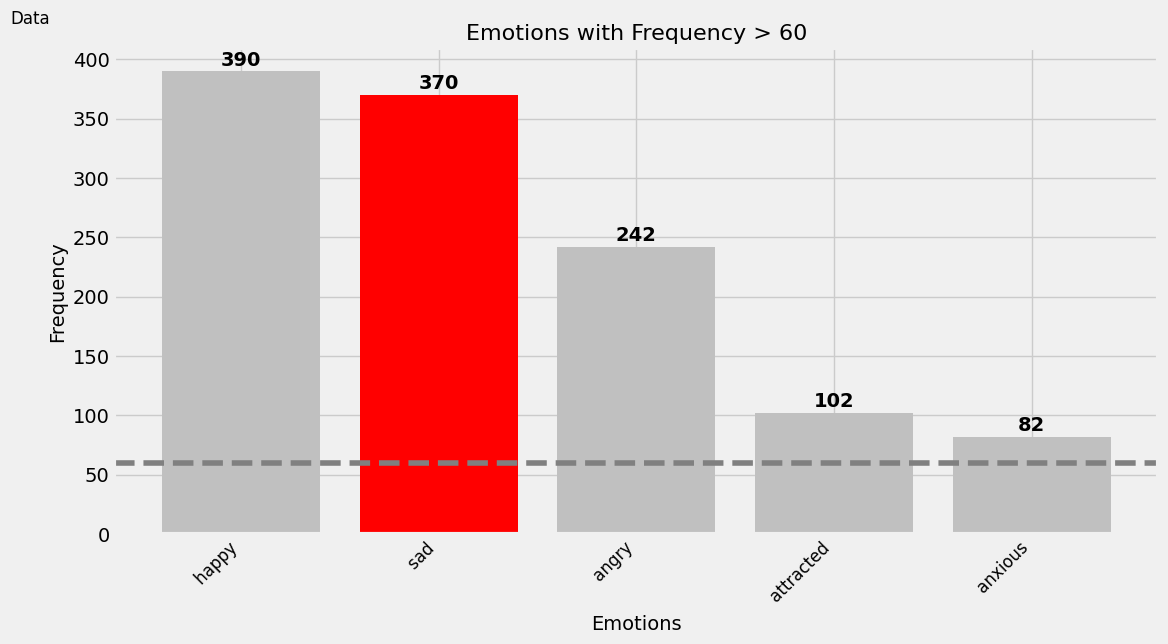

In [17]:
# turn the emotion list into dictionary
words_score_dict = dict(Counter(temp_emotion_list))

# now let's go more Specifically and just choose emotions with freq more than 60
more_than_60_emotions = dict((key, value) for (key, value) in words_score_dict.items() if value > 60)

# sort the dictionary by values in descending order
sorted_emotions = sorted(more_than_60_emotions.items(), key=lambda x: x[1], reverse=True)

# create a bar plot for emotions
fig, ax = plt.subplots(figsize=(12, 6))
for i, (emotion, frequency) in enumerate(sorted_emotions):
    if i == 0:
        ax.bar(emotion, frequency, color='silver')
    elif i == 1:
        ax.bar(emotion, frequency, color='red')
    else:
        ax.bar(emotion, frequency, color='silver')

# add a horizontal line at y=150 for reference
ax.axhline(y=60, color='grey', linestyle='--')

# set x-axis and y-axis labels
ax.set_xlabel('Emotions', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# set title and subtitle
ax.set_title('Emotions with Frequency > 60', fontsize=16)
ax.text(-0.1, 1.05, 'Data', fontsize=12, transform=ax.transAxes)

# adjust x-axis tick labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# add value labels to bars
for i, (emotion, frequency) in enumerate(sorted_emotions):
    ax.text(emotion, frequency + 5, str(frequency), color='black', ha='center', fontweight='bold')

# show the plot
plt.show()


### Word Cloud for Emotions

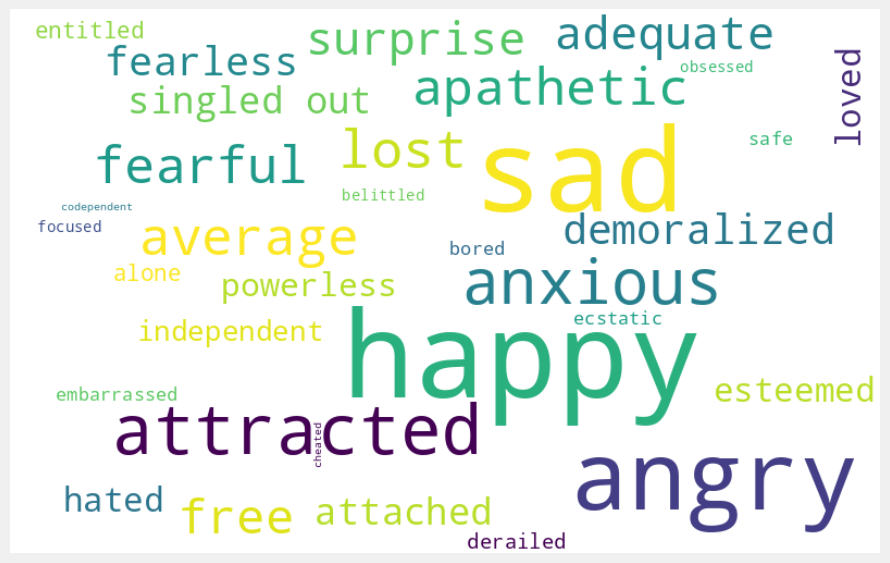

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(words_score_dict)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Plot For Frequent Categories

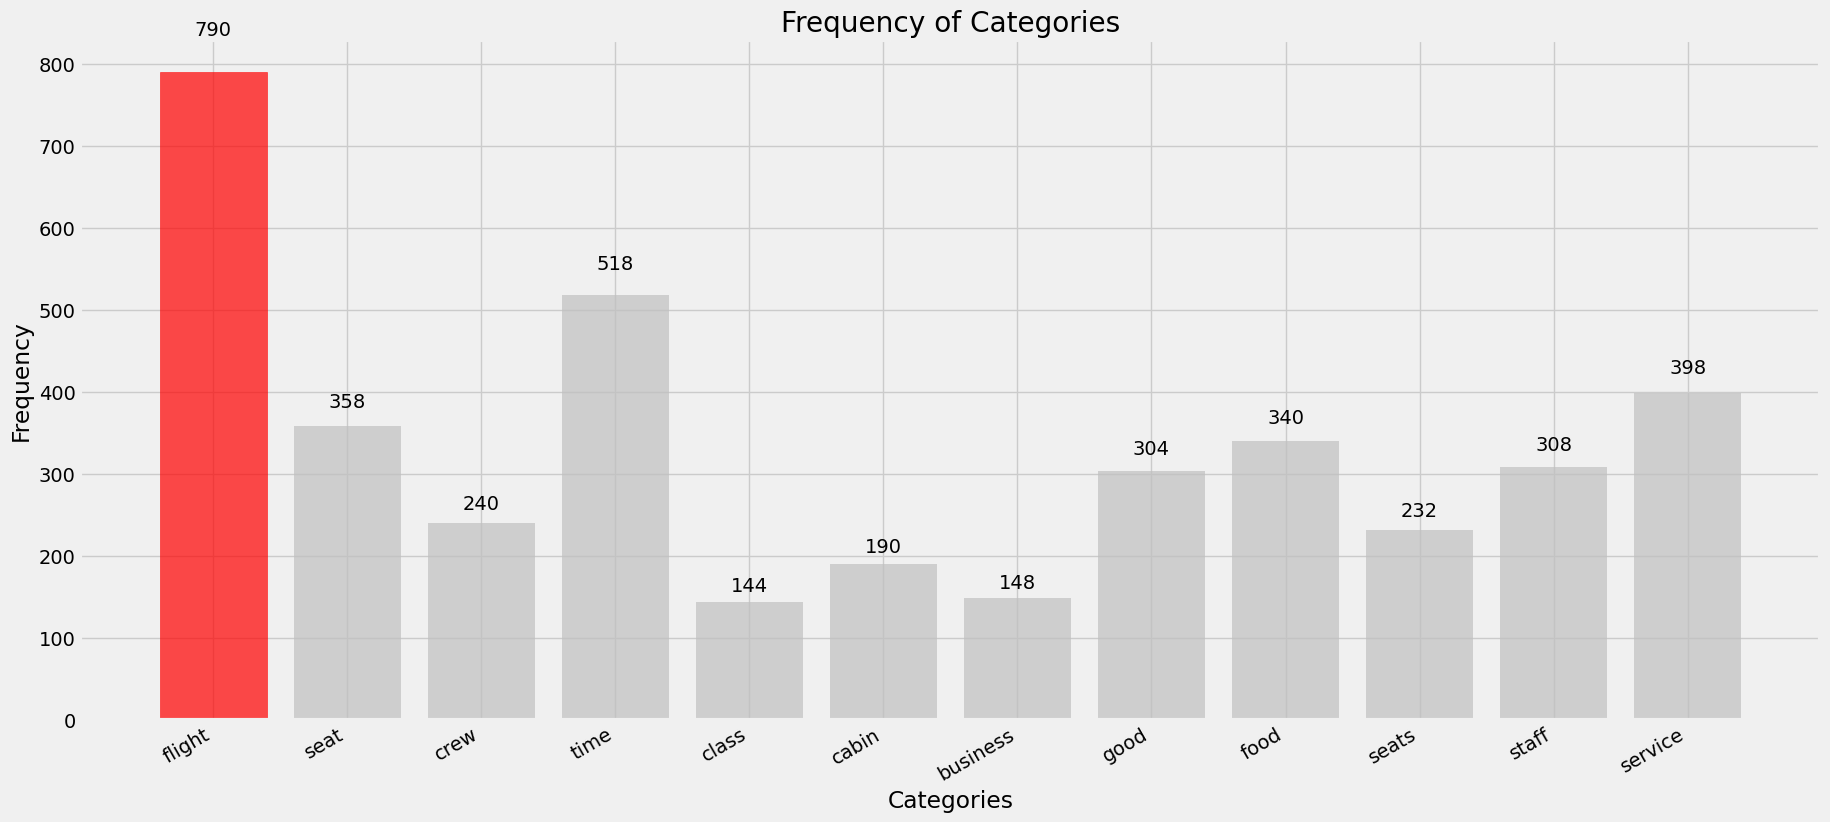

In [15]:
# turn the category list into dictionary
cat_score_dict = dict(Counter(temp_category_list))

# now let's go more Specifically and just choose categories with freq more than 10
more_than_10_cat = dict((key, value) for (key, value) in cat_score_dict.items() if value > 10)

fig, ax = plt.subplots()
bar_rects = ax.bar(more_than_10_cat.keys(), more_than_10_cat.values(), color='silver', alpha=0.7)

# add the values on top of each bar
for rect in bar_rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, '%d' % int(height), ha='center', va='bottom')

# change the color of the bar with the highest value
max_index = list(more_than_10_cat.values()).index(max(more_than_10_cat.values()))
bar_rects[max_index].set_color('red')

# the fit the text under graph
fig.autofmt_xdate()

# set title, xlabel, and ylabel
plt.title('Frequency of Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')

# change the width and length of plot
fig.set_figwidth(20)
fig.set_figheight(10)

#save the graph and show it
#plt.savefig('More_than_10_categories.png')
plt.show()


### Word Cloud for Categories

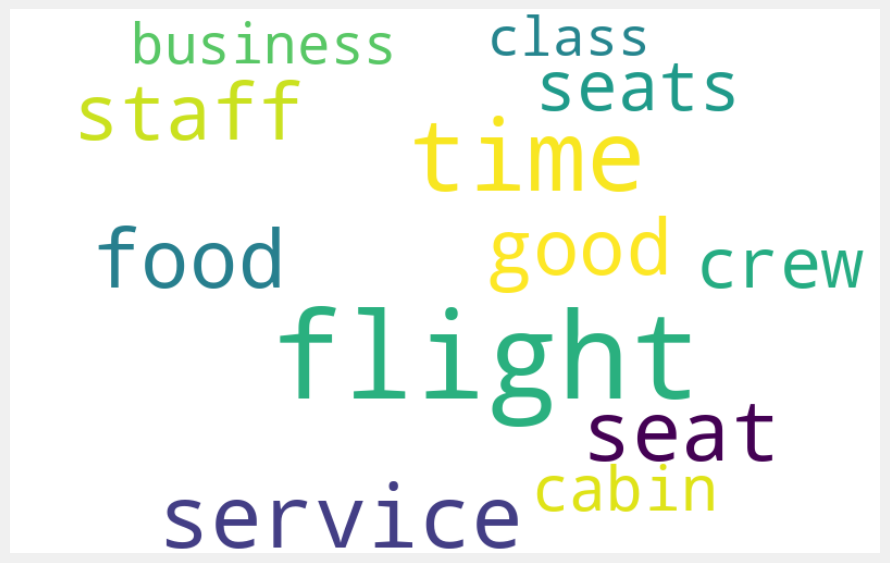

In [18]:
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(cat_score_dict)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [28]:
"""## Aspect-based Sentiment Analysis using a pre-trained BERT model"""

from transformers import BertForSequenceClassification, BertTokenizer
import torch
from collections import defaultdict
import matplotlib.pyplot as plt
import spacy
import re

# Load spaCy model for aspect extraction
nlp = spacy.load("en_core_web_sm")

# Load pre-trained BERT model and tokenizer
model_name = 'nlptown/bert-base-multilingual-uncased-sentiment'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Example aspect categories
aspects = ['flight', 'service', 'seat', 'food', 'crew']

def extract_aspects(text):
    doc = nlp(text)
    aspects_in_text = []
    for token in doc:
        if token.text.lower() in aspects:
            aspects_in_text.append(token.text.lower())
    return aspects_in_text

def aspect_sentiment_analysis(text, aspect):
    encoded_input = tokenizer(text, aspect, return_tensors='pt', truncation=True, padding=True)
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    label_ids = scores.argmax()
    if label_ids == 0:
        sentiment = 'negative'
    elif label_ids == 1:
        sentiment = 'neutral'
    else:
        sentiment = 'positive'
    return sentiment

def handle_negation(text):
    negation_pattern = r"(not|n't|never|no)\s+([\w\s]+?)\s*(bad|negative|poor)"
    negated_phrases = re.findall(negation_pattern, text, re.IGNORECASE)
    for phrase in negated_phrases:
        negated_phrase = phrase[1].strip()
        text = re.sub(r"\b" + re.escape(negated_phrase) + r"\b", "positive_" + negated_phrase, text, flags=re.IGNORECASE)
    return text

# Create a defaultdict to store sentiment counts for each aspect
aspect_sentiment_counts = defaultdict(lambda: defaultdict(int))

# Analyze sentiment for each review and aspect
for review_text in df['reviews']:
    review_text = handle_negation(review_text)  # Handle negations
    aspects_in_text = extract_aspects(review_text)  # Extract aspects from the review text
    for aspect in aspects_in_text:
        sentiment = aspect_sentiment_analysis(review_text, aspect)
        aspect_sentiment_counts[aspect][sentiment] += 1

# Print the sentiment counts for each aspect
print("Sentiment Counts by Aspect:")
for aspect, sentiment_counts in aspect_sentiment_counts.items():
    print(f"Aspect: {aspect}")
    for sentiment, count in sentiment_counts.items():
        print(f"  {sentiment}: {count}")
    print()

# Visualize the sentiment counts for each aspect
# ... (same code as before for creating the bar plot or pie chart)

Sentiment Counts by Aspect:
Aspect: flight
  neutral: 52
  negative: 701
  positive: 227

Aspect: seat
  positive: 58
  negative: 46
  neutral: 14

Aspect: crew
  positive: 72
  negative: 65
  neutral: 14

Aspect: food
  negative: 91
  positive: 88
  neutral: 40

Aspect: service
  positive: 97
  negative: 135
  neutral: 19



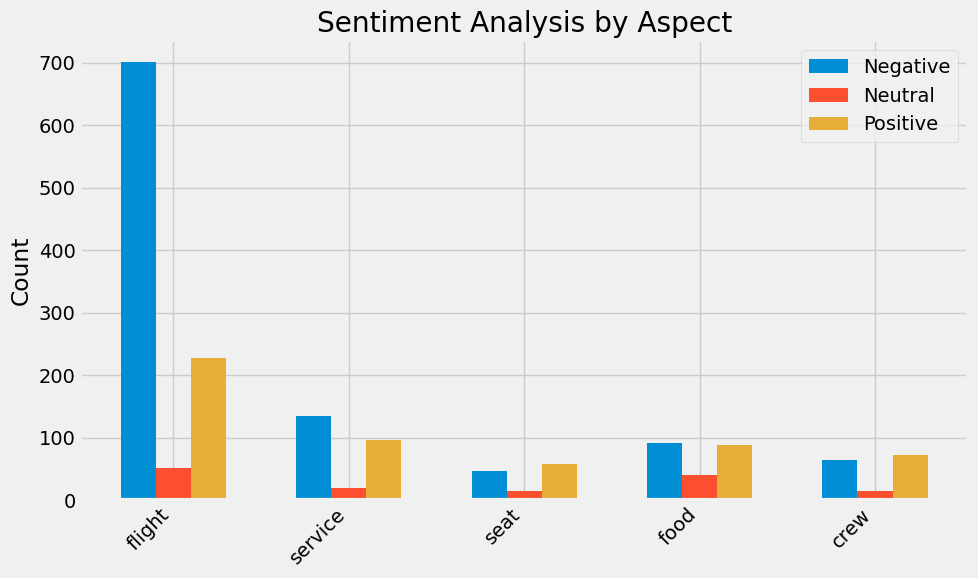

In [29]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np

# Function to create the bar plot
def create_bar_plot(aspect_sentiment_counts, aspects):
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.2
    index = np.arange(len(aspects))

    for i, sentiment in enumerate(['negative', 'neutral', 'positive']):
        sentiment_counts = [aspect_sentiment_counts[aspect][sentiment] for aspect in aspects]
        ax.bar(index + i * bar_width, sentiment_counts, bar_width, label=sentiment.capitalize())

    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(aspects, rotation=45, ha='right')
    ax.set_ylabel('Count')
    ax.set_title('Sentiment Analysis by Aspect')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Call the function to create the bar plot
create_bar_plot(aspect_sentiment_counts, aspects)

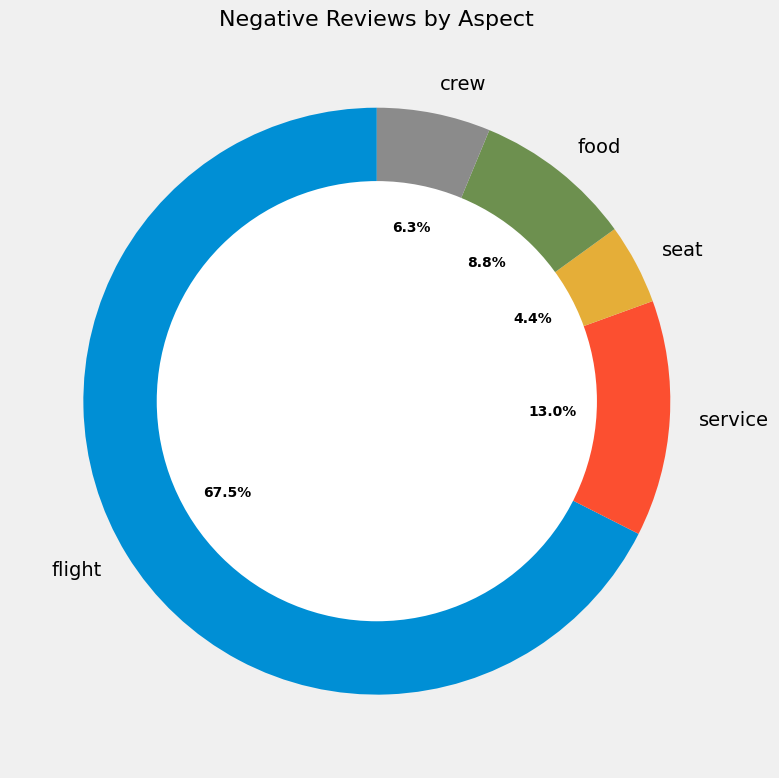

In [30]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np

# Function to create the pie chart for negative reviews
def create_negative_pie_chart(aspect_sentiment_counts, aspects):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Get the negative sentiment counts for each aspect
    negative_counts = [aspect_sentiment_counts[aspect]['negative'] for aspect in aspects]

    # Create the pie chart for negative reviews
    wedges, texts, autotexts = ax.pie(negative_counts, labels=aspects, autopct='%1.1f%%', startangle=90)

    # Add a circle at the center to create a donut chart
    centre_circle = plt.Circle((0, 0), 0.75, fc='white')
    ax.add_artist(centre_circle)

    # Add a title
    ax.set_title('Negative Reviews by Aspect', fontsize=16)

    # Adjust the text properties
    plt.setp(autotexts, size=10, weight='bold')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function to create the pie chart for negative reviews
create_negative_pie_chart(aspect_sentiment_counts, aspects)